# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Conclusions:
1. Temperature showed a trend, where it was found that as we move away from the equator in either direction (+90 to -90), the temperature decreases
2. At the equator, in the cities analyzed randomly, it was found that humidity was always above 40%
3. Cloudiness was distributed between 0-100% as latitute changes
4. Wind speed for majority of the cities analyzed seems to range between 0-15mph as latitute ranges between (-90 to +90)


In [30]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
#print(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

#print(cities)
#len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [99]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}&appid={api_key}&units={units}&q="
#cities = ["Paris", "Cleveland", "Mumbai"]
#temp = []
#for city in cities: 
#    response = requests.get(query_url + city).json()
#    temp.append(response["main"]["temp"])
#    print(response)
#print('temp')

cities_select = []
temp = []
humid = []
clouds = []
wind = []
lat_select = []
long_select = []

for city in cities:
    response = requests.get(query_url + city).json()
    #pprint(response) 
    if response["cod"] != "404":
        cities_select.append(response["name"])
        lat_select.append(response["coord"]["lat"])
        long_select.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [100]:
weather_dict = {"City": cities_select, "Longitute": long_select, "Latitude": lat_select, "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)": clouds, "Wind_Speed (m/h)": wind}
cities_weather = pd.DataFrame(weather_dict)
print(cities_weather.count())
print(cities_weather.set_index("City").head())
cities_weather.to_csv('output_data/weather_data.csv', index=False, header=True)

City                554
Longitute           554
Latitude            554
Temperature (F)     554
Humidity (%)        554
Cloudiness (%)      554
Wind_Speed (m/h)    554
dtype: int64
             Longitute  Latitude  Temperature (F)  Humidity (%)  \
City                                                              
Barrow          -60.23    -38.31            43.44            79   
Yeppoon         150.74    -23.13            73.40            35   
Axim             -2.24      4.87            76.92            89   
Santa Maria     -53.81    -29.69            48.48            90   
Rikitea        -134.97    -23.12            72.78            74   

             Cloudiness (%)  Wind_Speed (m/h)  
City                                           
Barrow                   60              6.80  
Yeppoon                   0              2.24  
Axim                     74              9.15  
Santa Maria              19              4.38  
Rikitea                 100             20.96  


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

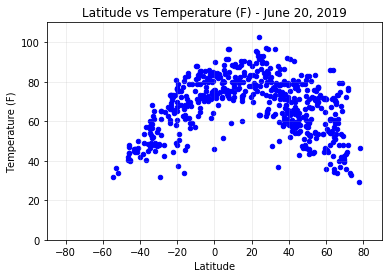

In [101]:
lat_temp = cities_weather.plot.scatter(x="Latitude", y="Temperature (F)", marker = 'o', c="blue")
plt.xlim (-90, 90)
plt.ylim(0, 110)
plt.title("Latitude vs Temperature (F) - June 20, 2019")
plt.grid(True, alpha=0.25)
plt.savefig('output_data/lat_vs_temp.png')

#### Latitude vs. Humidity Plot

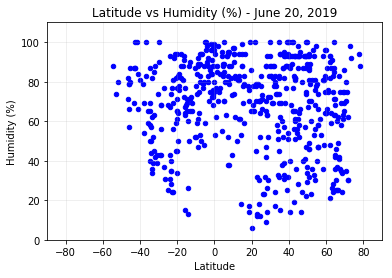

In [102]:
lat_humid = cities_weather.plot.scatter(x="Latitude", y="Humidity (%)", marker = 'o', c="blue")
plt.xlim (-90, 90)
plt.ylim(0, 110)
plt.title("Latitude vs Humidity (%) - June 20, 2019")
plt.grid(True, alpha=0.25)
plt.savefig('output_data/lat_vs_humid.png')

#### Latitude vs. Cloudiness Plot

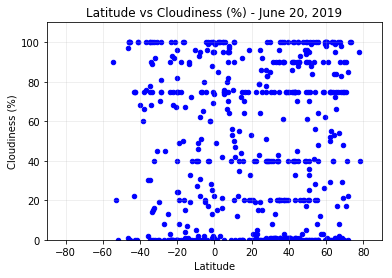

In [103]:
lat_cloud = cities_weather.plot.scatter(x="Latitude", y="Cloudiness (%)", marker = 'o', c="blue")
plt.xlim (-90, 90)
plt.ylim(0, 110)
plt.title("Latitude vs Cloudiness (%) - June 20, 2019")
plt.grid(True, alpha=0.25)
plt.savefig('output_data/lat_vs_cloud.png')

#### Latitude vs. Wind Speed Plot

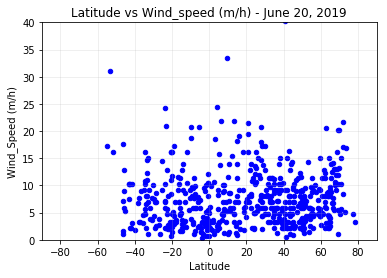

In [104]:
lat_wind = cities_weather.plot.scatter(x="Latitude", y="Wind_Speed (m/h)", marker = 'o', c="blue")
plt.xlim (-90, 90)
plt.ylim(0, 40)
plt.title("Latitude vs Wind_speed (m/h) - June 20, 2019")
plt.grid(True, alpha=0.25)
plt.savefig('output_data/lat_vs_wind.png')